In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv")
test = pd.read_csv("/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv")

In [4]:
#let's see the data features
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [6]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'target'), Text(0, 0.5, 'Count')]

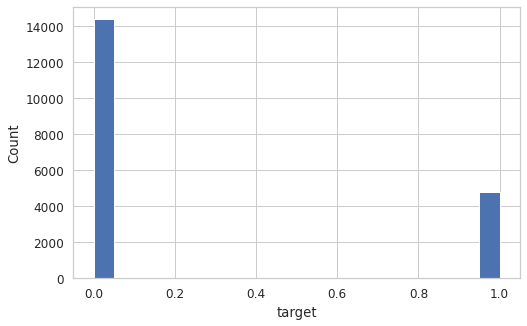

In [7]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    train['target'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='target', ylabel='Count')

Let's check missing Data occurences

In [8]:
#check NaN on Train and test
print(f"Nan on train-set: {train.isnull().values.any()}")
print(f"Nan on test-set: {test.isnull().values.any()}")

Nan on train-set: True
Nan on test-set: True


Let's find out the different levels of cat for each categorical variable

In [9]:
#Total Number of Nan on train and test
print(f"Total Nan on train-set: {train.isnull().sum().sum()}")
print(f"Total Nan on test-set: {test.isnull().sum().sum()}")

Total Nan on train-set: 20733
Total Nan on test-set: 2204


Concat train and test for data-cleaning

In [10]:
#concat train and test adding index
df = pd.concat([test.assign(ind="test"), train.assign(ind="train")])


Check Categorical Data levels

In [11]:
df['enrolled_university'].value_counts()

no_enrollment       15336
Full time course     4192
Part time course     1342
Name: enrolled_university, dtype: int64

In [12]:
# we can see most of candidate becomes from STEM disciplines
df['major_discipline'].value_counts()

STEM               16113
Humanities           749
Other                421
Business Degree      364
Arts                 270
No Major             245
Name: major_discipline, dtype: int64

In [13]:
df['education_level'].value_counts()

Graduate          12867
Masters            4857
High School        2239
Phd                 468
Primary School      344
Name: education_level, dtype: int64

In [14]:
# most of candidates have more than 20 year of experience
df['experience'].value_counts()

>20    3669
5      1593
4      1548
3      1508
6      1346
2      1255
7      1144
9      1093
10     1081
8       884
11      750
15      745
14      641
1       605
<1      596
16      576
12      546
13      453
17      378
19      333
18      306
20      167
Name: experience, dtype: int64

In [15]:
# how we can see there are too much level, we can try to define some ranges:
# 1-3 years, 4-6 years, 7-10 years, 10 more years
df.loc[(df.experience == "<1") | (df.experience == "1") | (df.experience == '2') | (df.experience == '3'), ['experience']] = "1-3"
df.loc[(df.experience == "3") | (df.experience == "4") | (df.experience == '5')| (df.experience == '6'), ['experience']] = "4-6"
df.loc[(df.experience == "7") | (df.experience == "8") | (df.experience == '9')| (df.experience == '10'), ['experience']] = "7-10"
df.loc[(df.experience == "11") | (df.experience == "12") | (df.experience == '13')| (df.experience == '14') | (df.experience == '15') | (df.experience == '16') | (df.experience == '17') | (df.experience == '18') | (df.experience == '19') | (df.experience == '20') | (df.experience == '>20'), ['experience']] = "10+"


In [16]:
df['experience'].value_counts()

10+     8564
4-6     4487
7-10    4202
1-3     3964
Name: experience, dtype: int64

In [17]:
df['relevent_experience'].value_counts()

Has relevent experience    15316
No relevent experience      5971
Name: relevent_experience, dtype: int64

<AxesSubplot:xlabel='city_development_index'>

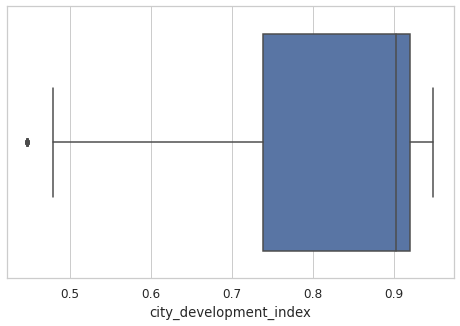

In [19]:
# first of all let's impute missing data
# let's see if there are outliers
sns.boxplot(x=df['city_development_index'])

<AxesSubplot:xlabel='training_hours'>

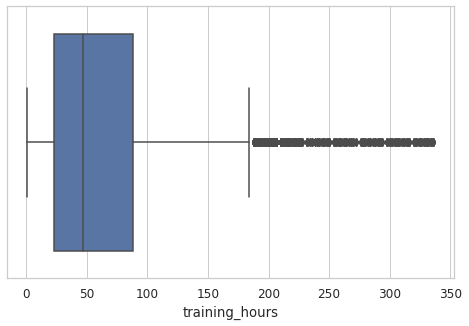

In [20]:
#we can think to impute with median for this variable NAN
sns.boxplot(x=df['training_hours'])

In [21]:
for column in df.columns:
    if not column.startswith("ind"):
        missing_nan = df[column].isnull().sum()
        print(f"{column} Nan: {missing_nan}")


enrollee_id Nan: 0
city Nan: 0
city_development_index Nan: 0
gender Nan: 4508
relevent_experience Nan: 0
enrolled_university Nan: 386
education_level Nan: 460
major_discipline Nan: 2813
experience Nan: 65
company_size Nan: 5938
company_type Nan: 6140
last_new_job Nan: 423
training_hours Nan: 0
target Nan: 0


In [22]:
# we should think about to remove the variables "company_type" and "company_size" having too much missing data.
df.drop(['company_type', 'company_size'], axis=1, inplace=True)  

Impute missing data:

In [26]:
df['gender'] = df['gender'].fillna("unknown")
df['enrolled_university'] = df['enrolled_university'].fillna("unknown")
df['education_level'] = df['education_level'].fillna("unknown")
df['major_discipline'] = df['major_discipline'].fillna("unknown")
df['experience'] = df['experience'].fillna("unknown")
df['last_new_job'] = df['last_new_job'].fillna("unknown")


Select all object colums

In [35]:
df.select_dtypes([object]).columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'last_new_job',
       'ind'],
      dtype='object')

Get dummies

In [36]:
df = pd.get_dummies(df, columns=['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'last_new_job'], drop_first=True)


In [43]:
df.drop('enrollee_id', axis=1, inplace=True)

In [44]:
#split again in train and test
test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]

train.drop('ind', axis=1, inplace=True)
test.drop(['ind', 'target'], axis=1, inplace=True)

In [51]:
X = train.drop('target', axis=1)
y = train['target']

In [52]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12835, 152) (6323, 152) (12835,) (6323,)


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))